In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sys
sys.path.insert(0, '..')

/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [17]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

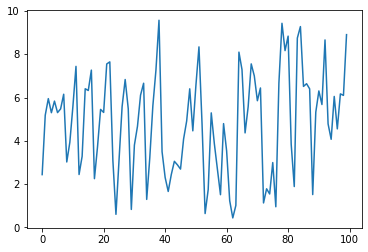

In [168]:
A,B = None,None
linear = True

if not linear:
    A = np.random.uniform(0,0.5,(6,6))
    B = np.random.uniform(0,0.5,(6,6))
else:    
    A = np.random.uniform(0,1,6)
    B = np.random.uniform(0,1,6)

mu = np.array([0,0,0,0,0,0]) #for mv normal
cov = np.diag([1,1,1,1,1,1]) #for mv normal
arrs  = []
T = 100 
max_arrivals = 10
xs = [np.random.multivariate_normal(mu, cov)]
for i in range(T):
    x = np.random.multivariate_normal(mu, cov)
    if not linear:
        arr = sigmoid(x.T@A@x) * max_arrivals #quadraric
    else:
        arr = sigmoid(x@A + xs[-1] @ B) * max_arrivals #linear
    arrs.append(arr)
    xs.append(x)
plt.plot(arrs)

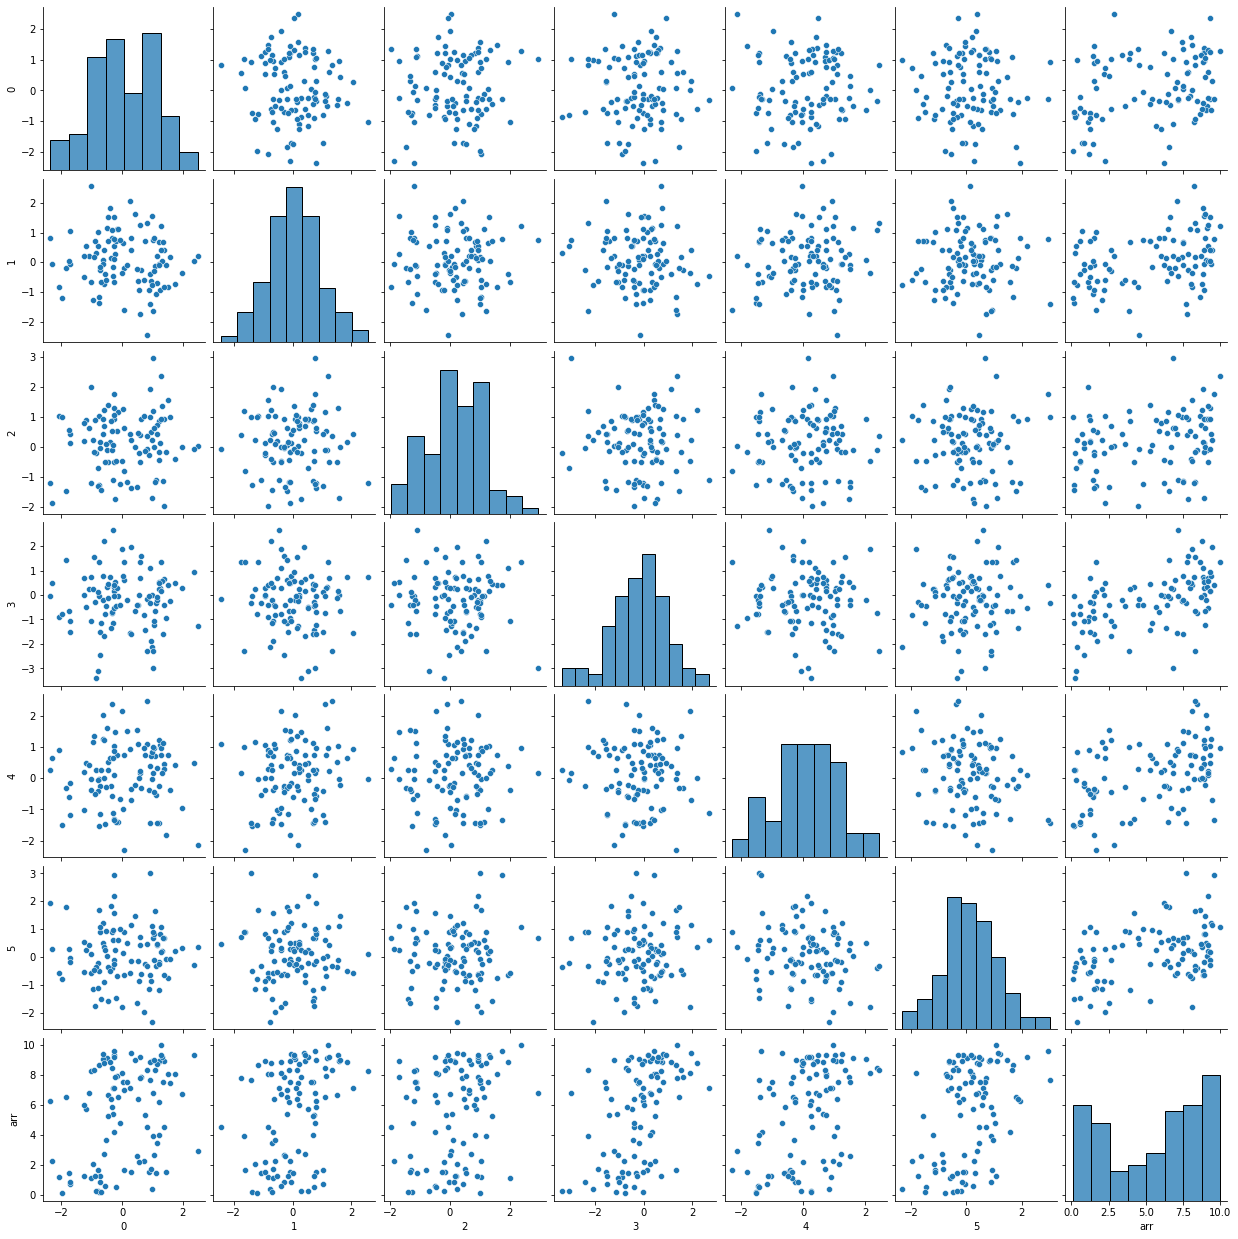

In [72]:
df = pd.DataFrame(xs)
df['arr'] = arrs
sns.pairplot(df)

In [4]:
from sim.LoadBalancer import LoadBalancer
from sim.Source import Source, QuadraticArrivalSchedule
from sim.Environment import Environment
from sim.GELoadBalancer import GreedyEpsilonLoadBalancerContextSampling

In [5]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

stopTime = 4*7*24*60*60
env = Environment(stopTime=stopTime)
model  = RandomForestRegressor(n_estimators=10)
eta = lambda t: sigmoid(2-0.01*t)
periodLength = 0.5*60*60 #half an hour per period -> schedule repeated two times in 12 hours
loadBalancer = GreedyEpsilonLoadBalancerContextSampling(nServers=10, environment=env, model = model, eta=eta, nServerRange=[10,45], usePartialFit=False, periodLength=periodLength)
source = Source(arrivalsPerSecond=10, requestTypes = [(0.5,1,0.1,10), (0.5,2,0.2,10)],environment=env, loadBalancer=loadBalancer) #(prob, mu, sigma, cancelTime)
arrivalSchedule = QuadraticArrivalSchedule(periodLength=periodLength,environment=env,source=source,loadBalancer=loadBalancer,maxArrivals=20)
env.run(debug=False)

TypeError: __init__() missing 2 required positional arguments: 'loadBalancer' and 'environment'